# Ford GoBike Trip Data Exploration
## by Golden Chikaire Egbua

## Table of Contents
* Introduction
* Preliminary Wrangling
    * Visual Assessment
    * Programatic Assessment
    * Issues
    * Data Cleaning
* Univariate Exploration
* Bivariate Explorationn
* Multivariate Exploration
* Conclusions
* References

## Introduction

Ford GoBike is the Bay Area's bike share system, introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Having the expectations that once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week and riders have access to all bikes in the network when they become a member or purchase a pass.

The dataset has the following collumns:

* duration_sec
* start_time
* end_time
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* user_type
* member_birth_year
* member_gender
* bike_share_for_all_trip



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import great_circle

%matplotlib inline

In [2]:
# Let'soad our dataset 
df = pd.read_csv('fordgobike_trip_data.csv')

### Visual Assessment

In [3]:
# Let's look at any 20 rows of the the data
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
143585,434,2019-02-07 14:57:30.6490,2019-02-07 15:04:45.4710,78.0,Folsom St at 9th St,37.773717,-122.411647,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4806,Subscriber,1979.0,Female,No
115579,493,2019-02-12 08:34:45.5480,2019-02-12 08:42:58.9510,101.0,15th St at Potrero Ave,37.767079,-122.407359,343.0,Bryant St at 2nd St,37.783172,-122.393572,6179,Subscriber,1986.0,Male,No
123309,281,2019-02-11 09:35:30.8690,2019-02-11 09:40:12.6080,47.0,4th St at Harrison St,37.780955,-122.399749,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4611,Subscriber,1983.0,Male,No
63215,842,2019-02-20 15:32:45.4450,2019-02-20 15:46:47.5910,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,285.0,Webster St at O'Farrell St,37.783521,-122.431158,4972,Subscriber,1984.0,Female,No
150175,187,2019-02-06 18:29:52.0730,2019-02-06 18:32:59.4880,13.0,Commercial St at Montgomery St,37.794231,-122.402923,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3589,Subscriber,1994.0,Male,No
12300,1186,2019-02-27 17:31:11.0370,2019-02-27 17:50:57.8140,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,101.0,15th St at Potrero Ave,37.767079,-122.407359,6095,Subscriber,1973.0,Male,No
40790,289,2019-02-22 19:43:50.4830,2019-02-22 19:48:39.7600,163.0,Lake Merritt BART Station,37.797320,-122.265320,338.0,13th St at Franklin St,37.803189,-122.270579,2181,Subscriber,1984.0,Male,No
95105,233,2019-02-15 15:03:56.2100,2019-02-15 15:07:49.8920,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4683,Customer,1983.0,Other,No
126699,801,2019-02-10 17:49:44.9140,2019-02-10 18:03:06.8290,154.0,Doyle St at 59th St,37.841924,-122.288045,242.0,Milvia St at Derby St,37.860125,-122.269384,5102,Subscriber,1986.0,Female,No
172729,1659,2019-02-03 14:35:40.2470,2019-02-03 15:03:19.6810,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,10.0,Washington St at Kearny St,37.795393,-122.404770,4464,Customer,NaN,NaN,No


### Programatic Assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for NaN values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Issues

1. There are missing values in some of the columns ('start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year' and 'member_gender').

2. Incorrect data formats(dtype):
    * The 'start_time' and 'end_time' columns should be in the datetime format instead of string format.
    * The 'start_station_id', 'bike_id', and the 'end_station_id' columns should be in object(string) format.
    * 'member_birth_year' column is in the float format instead of integer format.
    * 'bike_share_for_all_trip' column is in the string format instead of boolean format.

3. Create columns for the start day of the week and start hour.

4. Calculate the distance traveled using the latitude and longitude values in the dataset.

5. Calculate the speed of each trip using the distance traveled and the duration.

6. Calculate member_age from member_birth_year.

### Data Cleaning
In this section, we will clean **all** of the issues documented above. 

In [9]:
# firtsly, we need to create a new copy of our original data
df_new = df.copy()

### Issue #1: 
There are missing values in some of the columns ('start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year' and 'member_gender').

#### Define: 
Remove the rows with missing values

#### Code

In [10]:
# Remove rows that does not have gender value
df_new = df_new[df_new['member_gender'].isnull() == False]
# Remove rows that does not have start_station_id value
df_new = df_new[df_new['start_station_id'].isnull() == False]

#### Test

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [12]:
# Check for NaN values
df_new.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #2: 
Incorrect data formats(dtype)

#### Define: 
1. Change the datatype for the 'start_time' and 'end_time' columns to datetime format.
2. Change the datatype for the 'start_station_id', 'bike_id', and the 'end_station_id' columns to object(string) format.
3. Change the datatype for the 'member_birth_year' column to integer format.
4. Change the datatype for the 'bike_share_for_all_trip' column to boolean format.

#### Code

In [13]:
# Change start_time and end_time to datetime format
df_new.start_time = pd.to_datetime(df_new.start_time)
df_new.end_time = pd.to_datetime(df_new.end_time)

In [14]:
# Change the datatype for the 'start_station_id', 'bike_id', and the 'end_station_id' columns to string format.
df_new.start_station_id = df_new.start_station_id.astype(int)
df_new.start_station_id = df_new.start_station_id.astype(str)
df_new.bike_id = df_new.bike_id.astype(str)
df_new.end_station_id = df_new.end_station_id.astype('int64')
df_new.end_station_id = df_new.end_station_id.astype(str)

In [15]:
# Change the datatype for the 'member_birth_year' column to integer format.
df_new.member_birth_year = df_new.member_birth_year.astype('int64')

In [16]:
# Change the datatype for the 'bike_share_for_all_trip' column to boolean format.
df_new.bike_share_for_all_trip = (df_new.bike_share_for_all_trip == 'Yes')

#### Test

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [18]:
df_new.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
129621,326,2019-02-10 09:32:46.993,2019-02-10 09:38:13.443,114,Rhode Island St at 17th St,37.764478,-122.402570,91,Berry St at King St,37.771762,-122.398438,4635,Subscriber,1985,Male,False
118466,759,2019-02-11 18:47:46.223,2019-02-11 19:00:25.997,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2434,Subscriber,1996,Female,False
171960,243,2019-02-03 18:01:15.868,2019-02-03 18:05:19.853,197,El Embarcadero at Grand Ave,37.808848,-122.249680,200,2nd Ave at E 18th St,37.800214,-122.253810,4782,Subscriber,1994,Male,False
31533,326,2019-02-24 16:36:38.833,2019-02-24 16:42:05.245,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5441,Subscriber,1982,Male,False
121054,360,2019-02-11 16:14:15.334,2019-02-11 16:20:15.993,61,Howard St at 8th St,37.776513,-122.411306,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5223,Subscriber,1988,Female,False
153775,365,2019-02-06 11:42:25.429,2019-02-06 11:48:30.980,309,San Jose City Hall,37.337391,-121.886995,327,5th St at San Salvador St,37.332039,-121.881766,3781,Subscriber,1963,Male,False
141584,744,2019-02-07 17:47:29.160,2019-02-07 17:59:53.586,80,Townsend St at 5th St,37.775235,-122.397437,58,Market St at 10th St,37.776619,-122.417385,2882,Customer,1989,Male,False
114884,631,2019-02-12 09:04:25.652,2019-02-12 09:14:57.060,81,Berry St at 4th St,37.775880,-122.393170,8,The Embarcadero at Vallejo St,37.799953,-122.398525,6226,Subscriber,1988,Male,False
3323,813,2019-02-28 17:15:43.898,2019-02-28 17:29:17.363,8,The Embarcadero at Vallejo St,37.799953,-122.398525,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5328,Subscriber,1995,Female,False
48152,216,2019-02-22 08:15:04.766,2019-02-22 08:18:41.195,210,45th St at Manila,37.833294,-122.256224,176,MacArthur BART Station,37.828410,-122.266315,5775,Subscriber,1983,Male,False


### Issue #3: 
Create columns for the start day of the week and start hour.

#### Define: 
Extract the start day of the week and start hour from the start_time column and put them in new columns.

#### Code

In [19]:
# Start day
df_new['start_day'] = df_new['start_time'].dt.strftime('%a')
# Start hour
df_new['start_hour'] = df_new['start_time'].dt.hour

#### Test

In [20]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False,Thu,23


### Issue #4: 
Calculate the distance traveled using the latitude and longitude values in the dataset.

#### Define: 
Calculate the distance traveled using the latitude and longitude values in the dataset.

#### Code

In [21]:
# Calculate the distance traveled using geopy.distance.great_circle
df_new['distance_km'] = df_new.apply(lambda x: great_circle((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])).km, axis=1)

In [22]:
# Round the distance to 3 decimal place.
df_new['distance_km'] = df_new.distance_km.round(3)

#### Test

In [23]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,Thu,17,0.545
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,Thu,12,2.705
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,Thu,17,0.261
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,Thu,23,2.409
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False,Thu,23,3.332


### Issue #5: 
Calculate the speed of each trip using the distance traveled and the duration.

#### Define: 
Calculate the speed of each trip using the distance traveled in meters and the duration in seconds.

#### Code

In [24]:
# Calculate the speed in meters per second
def trip_speed(time, dist):
    a = (dist*1000)/(time)
    return a

df_new['speed'] = df_new.apply(lambda x: trip_speed(x['duration_sec'], x['distance_km']), axis=1)

In [25]:
# Round the speed to 2 decimal place.
df_new['speed'] = df_new.speed.round(2)

In [26]:
#  Drop the longitude and latitude columns
df_new.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

#### Test

In [27]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,distance_km,speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,False,Thu,17,0.545,0.01
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,Thu,12,2.705,0.04
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,False,Thu,17,0.261,0.01
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,Thu,23,2.409,1.52
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,False,Thu,23,3.332,1.86


### Issue #6: 
Calculate member_age from member_birth_year.

#### Define: 
Calculate member_age from member_birth_year.

#### Code

In [28]:
# Calculate member_age from member_birth_year.
df_new['member_age'] = 2019 - df_new['member_birth_year']

#### Test

In [29]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,distance_km,speed,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,False,Thu,17,0.545,0.01,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,Thu,12,2.705,0.04,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,False,Thu,17,0.261,0.01,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,Thu,23,2.409,1.52,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,False,Thu,23,3.332,1.86,60


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  bool          
 12  start_day       

### What is the structure of your dataset?

> This dataset contains 17 columns and 174,952 entries of bicycle trips. The dataset originally had 183,412 entries and 16 columns that were mostly numeric variables. I created five more columns and dropped four columns making the final dataset to have 17 columns as shown in the table below.

| SN | Column | Dtype |
| :- | :- | :- |
| 1 | duration_sec | int64 |
| 2 | start_time | datetime64[ns] |
| 3 | end_time | datetime64[ns] |
| 4 | start_station_id | object |
| 5 | start_station_name | object |
| 6 | end_station_id | object |
| 7 | end_station_name | object |
| 8 | bike_id | object |
| 9 | user_type | object |
| 10 | member_birth_year | int64 |
| 11 | member_gender | object |
| 12 | bike_share_for_all_trip | bool |
| 13 | start_day | object |
| 14 | start_hour | int64 |
| 15 | distance_km | float64 |
| 16 | speed | float64 |
| 17 | member_age | int64 |

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest include data related to the duration of a ride. This can be used to understand when bikes are in high or low demand and also understand the user related information including their age, gender, user type etc. These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The time-based information will be very helpfull and also the customer related data for each ride.

## Univariate Exploration

> In this section, we'll investigate distributions of individual variables.


In [31]:
# Set visualization style
sb.set_style('whitegrid')
sb.set_context("talk")

#### Question
What hours of the day do we have the most number of trips?

#### Visualization


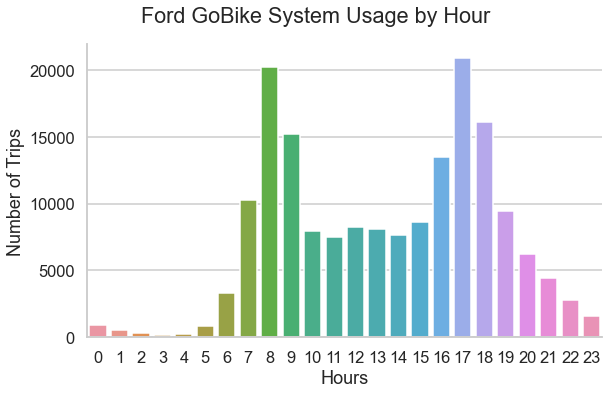

In [32]:
# Hourly usage of the Ford GoBike System
start_plot = sb.catplot(data = df_new, x='start_hour', kind='count', aspect = 1.7)

start_plot.set_axis_labels('Hours', 'Number of Trips')

start_plot.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05);

#### Observations
The most trips occurred during the morning hours of 7-9am, and in the evening hours of 4-7pm, which is typically the start and close of work in the United States. This suggests that the bikes are being used primarily by commuters to work.


#### Question
What days of the week do we have the most number of trips?

#### Visualization

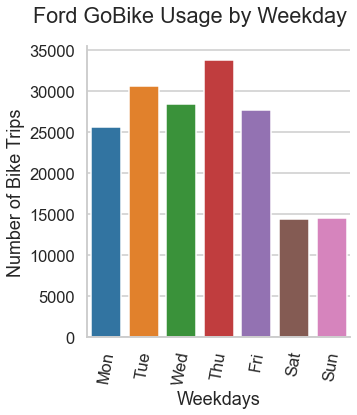

In [33]:
# Weekday usage of the Ford GoBike system
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

start_plot = sb.catplot(data=df_new, x='start_day', kind='count', order = days)

start_plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

start_plot.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05);

start_plot.set_xticklabels(rotation=80);

#### Observations
The most number of trips occurred during the work days (Mondays - Fridays) with Thurdays having the highest number of trips. This also suggests that the bikes are being used primarily by commuters to work or school.

#### Question
What is the duration of a typical trip according to our data?

#### Visualization

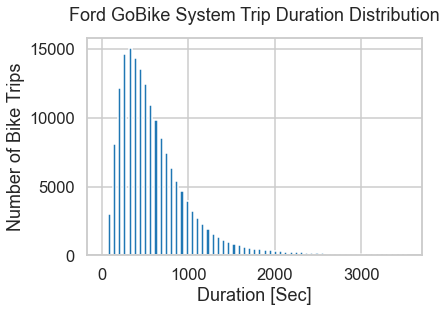

In [34]:
# Duration of the bike rides
bin_list = np.arange(0, 3600, 60)

plt.hist(data = df_new, x = 'duration_sec', bins = bin_list, rwidth = 0.6);

plt.title("Ford GoBike System Trip Duration Distribution", y=1.05)
plt.xlabel('Duration [Sec]')
plt.ylabel('Number of Bike Trips');

#### Observations
Looking at the histogram, we can see that the graph is skewed to the right, and over 75% of the trips lasted for less than 1000seconds. This suggests that most riders use the bikes for short distance trips.

#### Question
How fast do the users ride?

#### Visualization

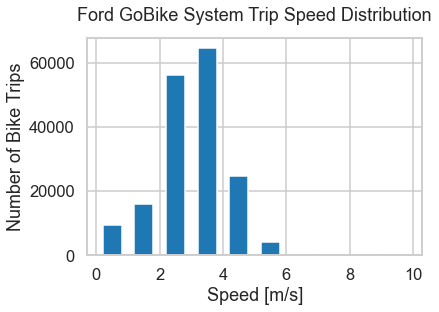

In [35]:
# Speed of the bike rides
plt.hist(data = df_new, x = 'speed', rwidth = 0.6);

plt.title("Ford GoBike System Trip Speed Distribution", y=1.05)
plt.xlabel('Speed [m/s]')
plt.ylabel('Number of Bike Trips');

#### Observations
Looking at the histogram, most of the trips had their speed between 2[m/s] and 4[m/s].

In [36]:
# Let's see some more statistical data
df_new.speed.describe()

count    174952.000000
mean          3.011124
std           1.087184
min           0.000000
25%           2.420000
50%           3.080000
75%           3.710000
max          10.000000
Name: speed, dtype: float64

#### Observation
The mean speed is 3.08[m/s] and 75% of the trips had speed of 3.71[m/s] and below.

#### Question
Do most riders use the bikes for short or long distance trips?

#### Visualization

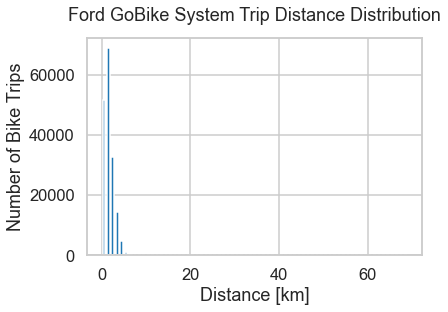

In [37]:
# Distance of the trip
bin_list = np.arange(0, 70)
plt.hist(data = df_new, x = 'distance_km', bins = bin_list, rwidth = 0.6);

plt.title("Ford GoBike System Trip Distance Distribution", y=1.05)
plt.xlabel('Distance [km]')
plt.ylabel('Number of Bike Trips');

#### Observations
Looking at the histogram, most of the bikers travelled for distances less than 10[km].
Let's use a boxplot to see the outliers

Text(0.5, 0, 'Distance [km]')

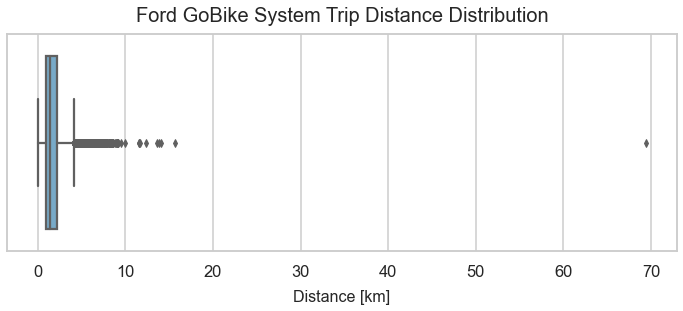

In [38]:
# Let's use a boxplot
plt.figure(figsize=(12,4))
sb.boxplot(x='distance_km', data=df_new, palette='Blues', orient='h')
plt.title("Ford GoBike System Trip Distance Distribution", fontsize=20, y=1.03)
plt.xlabel("Distance [km]", fontsize=16, labelpad=10)

#### Observation
Most of the bikers travelled for distances less than 10[km] and there are outliers expecially the one close to 70[km].
This also suggests that the riders use the bikes for short distance trips.

In [39]:
df_new.distance_km.describe()

count    174952.000000
mean          1.690053
std           1.096961
min           0.000000
25%           0.910000
50%           1.430000
75%           2.224000
max          69.469000
Name: distance_km, dtype: float64

The outlier is 69.469[km] so let's remove it.

In [40]:
# Let's remove the outlier by limiting our distance to 18[km] and below.
df_new = df_new[df_new['distance_km']<=18]

#### Question
What is the age range of the bike users?

#### Visualization

Text(0.5, 0, 'Age [yrs]')

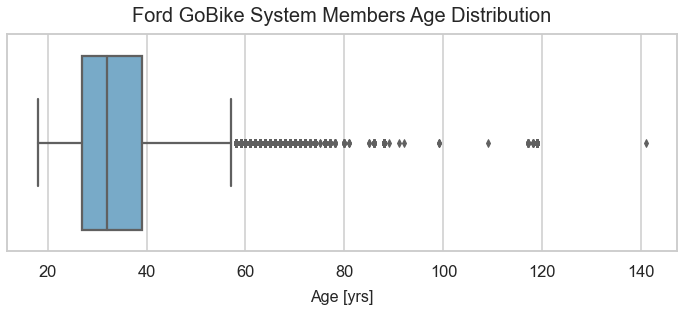

In [41]:
plt.figure(figsize=(12,4))
sb.boxplot(x='member_age', data=df_new, palette='Blues', orient='h')
plt.title("Ford GoBike System Members Age Distribution", fontsize=20, y=1.03)
plt.xlabel("Age [yrs]", fontsize=16, labelpad=10)

#### Observations
Looking at the boxplot, most of the users were between 18yrs and 60yrs, 75% of which were below 40years.
There are also outliers, expecially the unbelievable value above 140yrs.
This suggests that most of the commuters were adults of the working age range.

In [42]:
# Let's remove the outliers by limiting the age to 60yrs and below.
df_new = df_new[df_new['member_age']<=60]

#### Question
Which gender patronize the Ford GoBike System the most according to our data?

#### Visualization

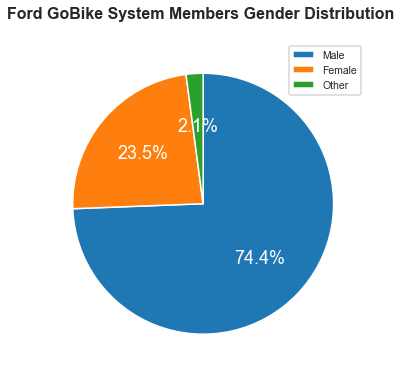

In [43]:
# Usage gender
gender = df_new.member_gender.value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.title('Ford GoBike System Members Gender Distribution ', y=1.05, fontsize=16, fontweight='bold');
plt.legend(fontsize='xx-small', loc='upper right')

#### Observations
The pie chart above shows that majority of the users of the bike share system are male, representing 74.4% of the total users, while female represented 23.5% and other represented 2.1%.

#### Question
Which User Type patronize the Ford GoBike System the most according to our data?

#### Visualization

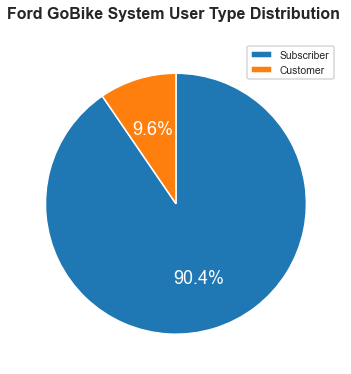

In [44]:
# User Type
user = df_new.user_type.value_counts()
plt.figure(figsize=(6,6))
plt.pie(user, labels = user.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.title('Ford GoBike System User Type Distribution ', y=1.05, fontsize=16, fontweight='bold')
plt.legend(fontsize='xx-small', loc='upper right')

#### Observations
The majority of users of the Ford Go Bike System are Subscribers (i.e. users who subscribe to the monthly membership), representing 90.4% of the total users, while Customers represented 9.6%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The major unusual points were the outliers in the distance and the member ages most expecially the unbelievable age above 140yrs.
> I had to limit the age to 60yrs and below and the distance to 18[km] and below to remove the outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Every thing seem like the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults going to work are the major users of the system.

## Bivariate Exploration

> In this section, Let's investigate the relationships between pairs of variables in our
data.

#### Question
What is the relationship between trip duration and gender?

#### Visualization

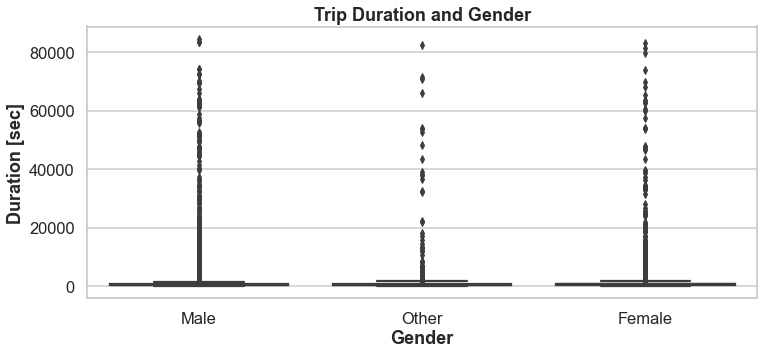

In [45]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'member_gender', y = 'duration_sec')
plt.title('Trip Duration and Gender', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Duration [sec]', fontweight='bold')
plt.show()

#### Observations
The boxplot is not clear because of the numerous outliers, so let us limit our duration to 2000seconds and below

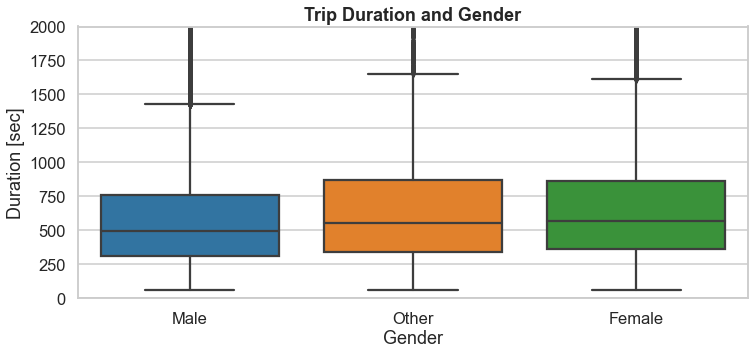

In [46]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'member_gender', y = 'duration_sec')
plt.title('Trip Duration and Gender', fontweight='bold')
plt.ylim([0, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration [sec]')
plt.show()

#### Observations
Looking at the boxplot, the male users rode for lesser duration than the female and the other gender. This could be due to strength, better skills or shorter distance. 

#### Question
What is the relationship between trip duration and User Type?

#### Visualization

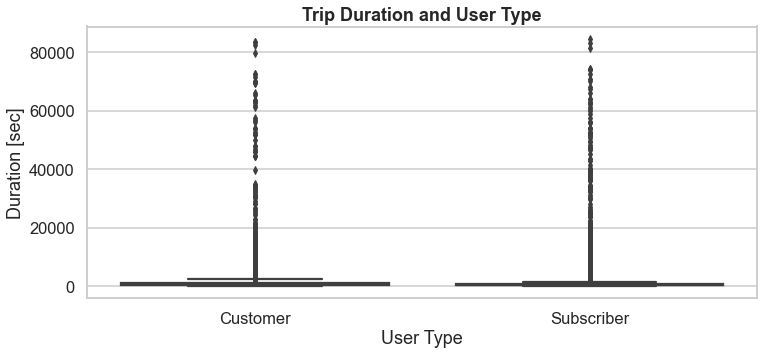

In [47]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'user_type', y = 'duration_sec')
plt.title('Trip Duration and User Type', fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration [sec]')
plt.show()

#### Observations
The boxplot is not clear because of the numerous outliers, so let us limit our duration to 3000seconds and below

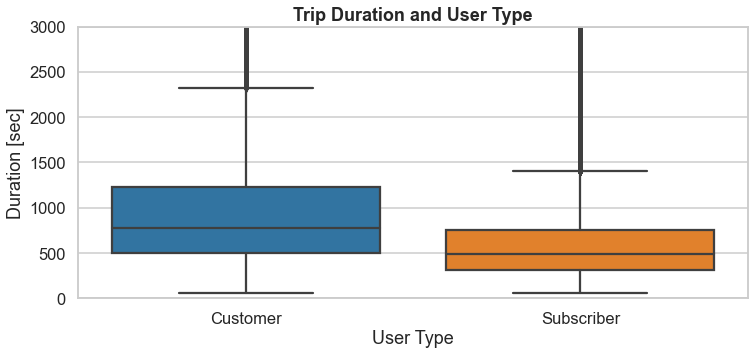

In [48]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'user_type', y = 'duration_sec')
plt.title('Trip Duration and User Type', fontweight='bold')
plt.ylim([0, 3000])
plt.xlabel('User Type')
plt.ylabel('Duration [sec]')
plt.show()

#### Observations
Interestingly, we can see that higher percentage of customer rides longer trips than subscriber although number of subscriber riders is more than number of customer riders. This implies that the commuting distance for the subscribers is less than the average ride a customer takes.

#### Question
What is the comparism between Customer Trips and Subscriber Trips?

#### Visualization

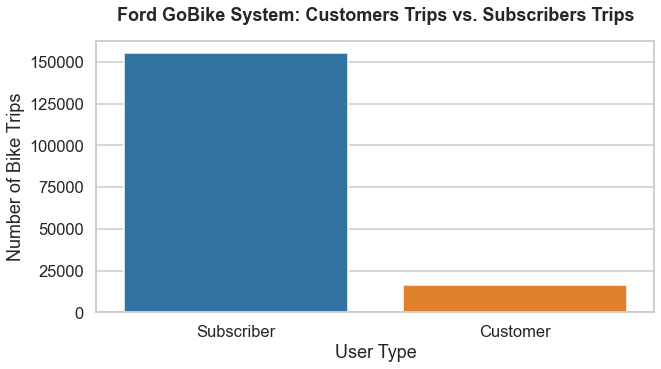

In [49]:
# Customers Trips vs. Subscribers Trips
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_new, x = "user_type", order = df_new.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.title('Ford GoBike System: Customers Trips vs. Subscribers Trips', y=1.05, fontweight='bold');

#### Observations
The majority of users of the Ford Go Bike System are Subscribers (i.e. users who subscribe to the monthly membership), representing 90.4% of the total users, while Customers represented 9.6%.

#### Question
What is the comparism between Customer Trips and Subscriber Trips in relation to the day of the week?

#### Visualization

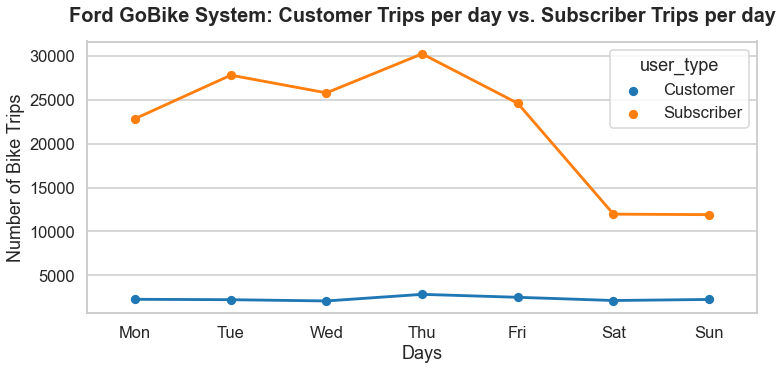

In [50]:
# Customers Trips per day vs. Subscribers Trips per day
plt.figure(figsize=(12, 5))

user_per_day = df_new.groupby(['start_day', 'user_type']).size().reset_index()

ax = sb.pointplot(data=user_per_day, x='start_day', y=0, hue = 'user_type', scale=0.7, order = days);

plt.title('Ford GoBike System: Customer Trips per day vs. Subscriber Trips per day', y=1.05, fontsize=20, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Number of Bike Trips');

#### Observations
As expected, Subscribers had far more rides per day in comparism with the Customers, and the number of rides on saturday and sunday are the least.

#### Question
What is the relationship between trip Speed and gender?

#### Visualization

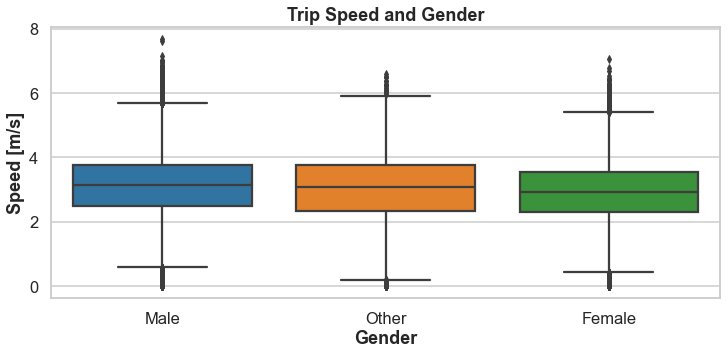

In [51]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'member_gender', y = 'speed')
plt.title('Trip Speed and Gender', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Speed [m/s]', fontweight='bold')
plt.show()

#### Observations
We can see from the graph that males rode at higher speed than the females, this could be the reason for the males spending shorter time on the road.

#### Question
What is the relationship between trip distance and gender?

#### Visualization

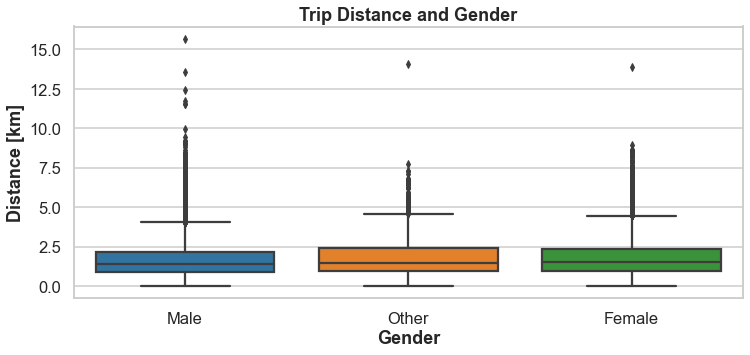

In [52]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'member_gender', y = 'distance_km')
plt.title('Trip Distance and Gender', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Distance [km]', fontweight='bold')
plt.show()

#### Observations
We can see from the graph that females and others rode for longer distance than the males, this could also be the reason for the males spending shorter time on the road.

#### Question
What is the relationship between Trip Speed and User Type?

#### Visualization

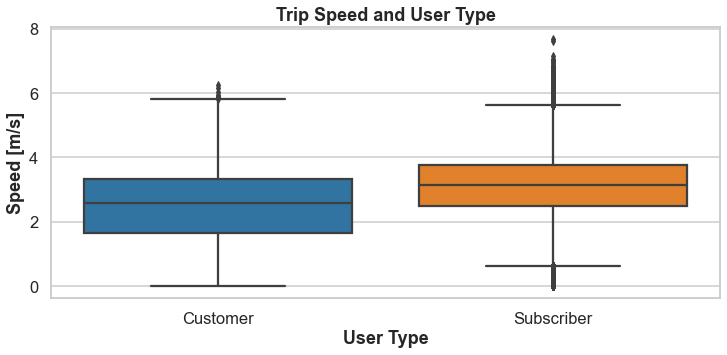

In [53]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_new, x = 'user_type', y = 'speed')
plt.title('Trip Speed and User Type', fontweight='bold')
plt.xlabel('User Type', fontweight='bold')
plt.ylabel('Speed [m/s]', fontweight='bold')
plt.show()

#### Observations
We can see from the graph, that subscriber riders move at higher speed than customers, this could be because they might be rushing to work or school, while customers are mostly tourists around the Bay Area.

#### Question
What is the relationship between Trip Distance and User Type?

#### Visualization

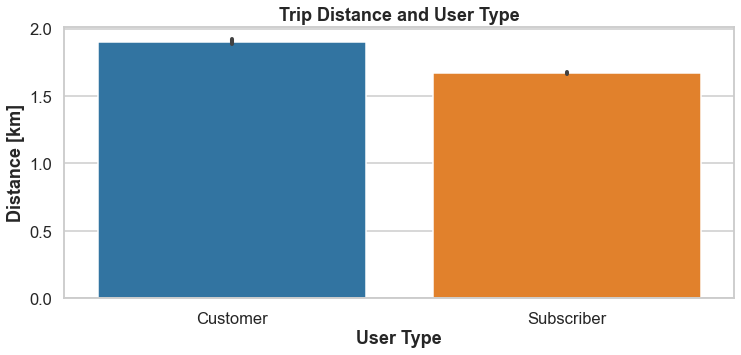

In [54]:
plt.figure(figsize = [12, 5])
sb.barplot(data = df_new, x = 'user_type', y = 'distance_km')
plt.title('Trip Distance and User Type', fontweight='bold')
plt.xlabel('User Type', fontweight='bold')
plt.ylabel('Distance [km]', fontweight='bold')
plt.show()

#### Observations
Interestingly, we can see that higher percentage of customer rodes longer trips than subscriber although number of subscriber riders are very high than customer. This explains the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The analysis relating to the user type revealed different behavior usage between customers and subscribers. The data suggests that customers are mostly casual riders such as tourists, or people on vacation or holiday. In contrast, the data suggests that Subscribers are daily commuters to work or students who use the system during weekdays, mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (7-9am and 4-6pm).
>Trip Duration also depend on the gender of the users, where the male users rode for lesser duration than the female gender, owing to their higher speed and shorter travel distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>I thought that user type and gender variables having higher number of trips would get higher trip duration but it is the opposite. For instance, male members had very high number of trips but got the lowest trip duration. Subscriber members also had very high number of trips but got the lowest trip duration.

## Multivariate Exploration

> Let us create plots of three or more variables to investigate our data even
further.

#### Question
Is there a relationship between the number of Trips per Day, number of Trips per Hour and User type?

#### Visualization

In [55]:
# Setting the correct weekday order
df_new["start_day"] = pd.Categorical(df_new["start_day"], 
                                          categories = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], 
                                          ordered = True)

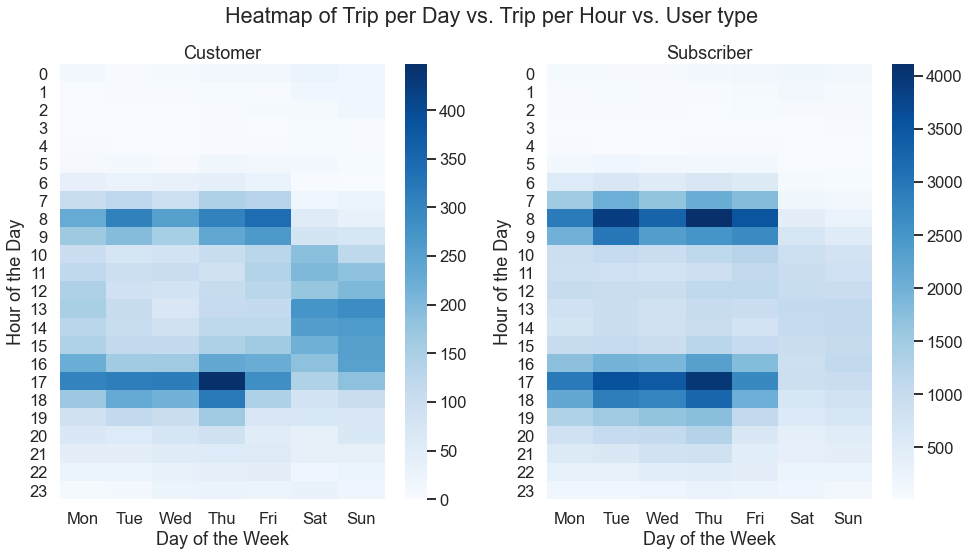

In [56]:
# Let's plot to heatmaps side by side
# One for cutomers and the other for subscribers
plt.figure(figsize = (16,8))
plt.suptitle('Heatmap of Trip per Day vs. Trip per Hour vs. User type')

plt.subplot(1, 2, 1)
customer_users = df_new.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
customer_users = customer_users.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(customer_users, cmap = "Blues")
plt.title("Customer")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 2, 2)
subscriber_users = df_new.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
subscriber_users = subscriber_users.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(subscriber_users, cmap = "Blues")
plt.title("Subscriber")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

#### Observations
Analyzing the behavior of the Customer user type, we can see that the most bike trips happen in hour 17, hour 18 and hour 8 during the weekdays with highest on Thursdays. In the weekend, the hour with the peak of bike trips is 13. The Subscriber user type uses the bike during the weekdays with the peak recorded in hours 8, 17, 18 and 9. The lowest value showing on the Subscriber scale (500 trips) is higher than the highest value showing on the Customer scale (400 trips). This is because Subscribers had far more rides per day in comparism with the Customers.

#### Question
Is there a relationship between the daily number of bike trips per subscriber, and their age group?

#### Visualization

In [57]:
# Let's see what the ages look like
df_new.member_age.describe()

count    171421.000000
mean         33.523384
std           8.954949
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: member_age, dtype: float64

In [58]:
# Create a new field for member age groups from the member_age column
df_new['member_age_groups'] = df_new['member_age'].apply(lambda x: '10 - 20' if 10<=x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else x)

In [59]:
df_new.member_age_groups.value_counts()

21 - 30    70054
31 - 40    63807
41 - 50    22024
51 - 60    11323
10 - 20     4213
Name: member_age_groups, dtype: int64

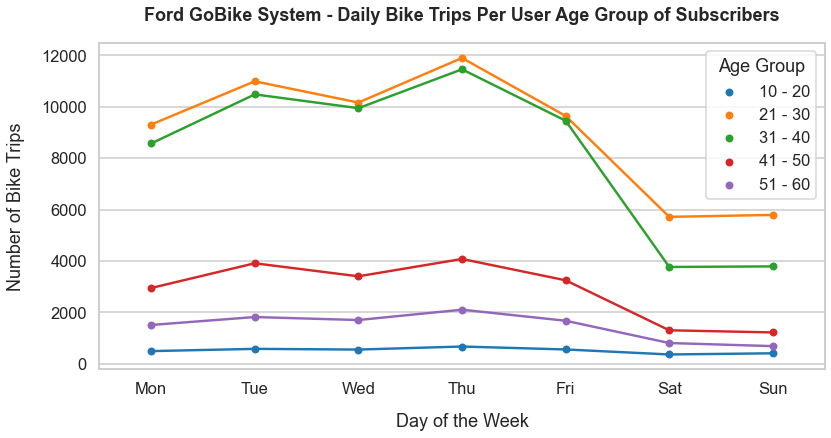

In [60]:
# Comparing daily number of bike trips per subscribers, based on their age group

subscribers_age_df = df_new.query('user_type == "Subscriber"').groupby(['start_day', 'member_age_groups']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize = (13,6))

sb.pointplot(data = subscribers_age_df, x='start_day', y='bike_id', hue='member_age_groups', scale=0.6, order = days, height=5, aspect=2);

plt.xlabel('Day of the Week', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Daily Bike Trips Per User Age Group of Subscribers", y = 1.05, fontweight = 'bold');
plt.legend(title='Age Group')
plt.show()

#### Observations
Subscribers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system. They also lead the spike which occurs across all age groups in Thursdays. Subscribers who fall in the 31-40 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend as the 21-30 year olds on Thursdays. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system followed by the oldest age group, the 51-60 years olds.

#### Question
Is there a relationship between the daily number of bike trips per customer, and their age group?

#### Visualization

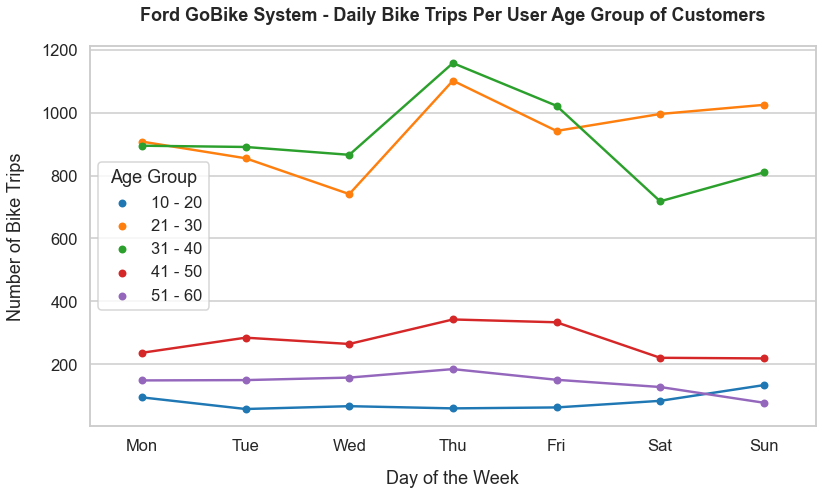

In [63]:
# Comparing daily number of bike trips per customer, based on their age group

customer_age_df = df_new.query('user_type == "Customer"').groupby(['start_day', 'member_age_groups']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize = (13,7))

sb.pointplot(data = customer_age_df, x='start_day', y='bike_id', hue='member_age_groups', scale=0.6, order = days, height=5, aspect=2);

plt.xlabel('Day of the Week', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Daily Bike Trips Per User Age Group of Customers", y = 1.05, fontweight = 'bold');
plt.legend(title='Age Group')
plt.show()

#### Observations
Customers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system on Mondays, saturdays and sundays. while the Customers who fall in the 31-40 year old age group are the most common age group to use the bike sharing system on every other day of the week. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system except on sundays where they have more rides than the oldest age group, the 51-60 years olds.

#### Question
Is there a relationship between the Trip Mean Duration per Day, the Trip Mean Duration per Hour and the Member Gender?

#### Visualization

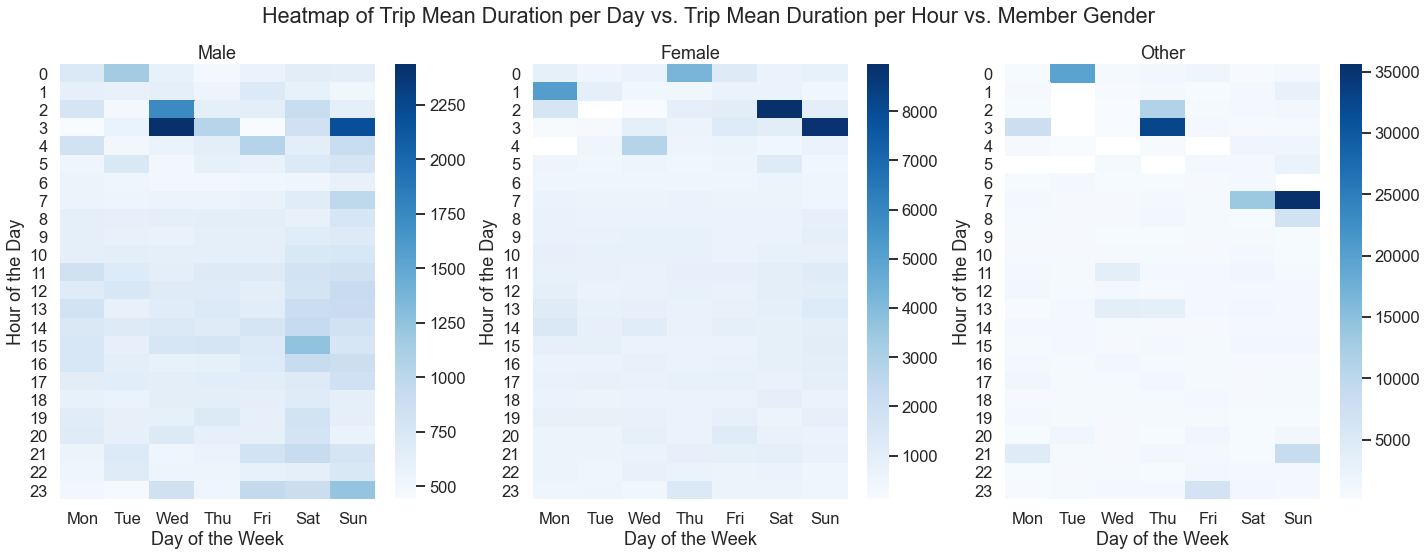

In [62]:
plt.figure(figsize = (24,8))
plt.suptitle('Heatmap of Trip Mean Duration per Day vs. Trip Mean Duration per Hour vs. Member Gender')

plt.subplot(1, 3, 1)
male_users = df_new.query('member_gender == "Male"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
male_users = male_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(male_users, cmap = "Blues")
plt.title("Male")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 3, 2)
female_users = df_new.query('member_gender == "Female"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
female_users = female_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(female_users, cmap = "Blues")
plt.title("Female")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 3, 3)
other_users = df_new.query('member_gender == "Other"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
other_users = other_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(other_users, cmap = "Blues")
plt.title("Other")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

#### Observations
Analyzing the mean duration per day and hour in respect to the member gender, we can see that the most bike trips duration for the male happen in hour 3 on wednesday and sunday and hour 2 on wednesday, the most bike trips duration for the female happen in hour 3 on sunday and hour 2 on saturday, while that of the other gender happen in hour 3 on Thursday and hour 7 on sunday. The maximum value showing on the male mean duration scale is 2500seconds, while that of female is 9000seconds and that of other other gender is 35000seconds. This shows that the male members spend the least time on the road followed by the female members while the other gender members spend the highest time on the road.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When we include a third variable, the insight became more complete. This section essentially amplified the previous findings through different visuals and adding in more variables to compare to other variables. Subscriber age vs Customer age was expanded upon through the use of age groups, and a pointplot to demonstrate the varing habits of each age group. The first heatmap revealed the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, we also saw from the second heatmap that the male members spend the least time on the road followed by the female members while the other gender members spend the highest time on the road.

### Were there any interesting or surprising interactions between features?

> It was interesting to note that the users in the working class age range (21-40year) had very many rides as compared to the other age groups, both in the customer and subscriber categories. Which means that they were not only interested in the bikes for commuting purpose alone but also for vacations and tours.

## Conclusions
>The main findings from the data exploration are:
> * The bikes are being used primarily by commuters to work or school.
> * Most riders use the bikes for short distance trips of distances less than 10[km].
> * most of the trips had their speed between 2[m/s] and 4[m/s]. The mean speed is 3.08[m/s] and 75% of the trips had speed of 3.71[m/s] and below.
> * 74.4% of the users of the bike share system are male, while 23.5% are female and 2.1% are other.
> * The majority of users of the Ford Go Bike System are Subscribers (i.e. users who subscribe to the monthly membership), representing 90.4% of the total users, while Customers represented 9.6%
> * the male users rode for lesser duration than the female and the other gender. The males also rode at higher speed than the females, while females and others rode for longer distance than the males.
> * The commuting distance for the subscribers is less than the average ride a customer takes.
> * Subscribers had far more rides per day in comparism with the Customers, and the saturday and sunday rides are the least.
> * subscriber riders move at higher speed than customers, this could be because they might be rushing to work or school, while customers are mostly tourists around the Bay Area.
> * Customer rode longer trips than subscriber. This explains the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.
> * Most Customer bike trips happen in hour 17, hour 18 and hour 8 during the weekdays with highest on Thursdays. In the weekend, the hour with the peak of bike trips is 13. The Subscriber user type uses the bike during the weekdays with the peak recorded in hours 8, 17, 18 and 9.
> * Subscribers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system. They also lead the spike which occurs across all age groups in Thursdays. Subscribers who fall in the 31-40 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend as the 21-30 year olds on Thursdays. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system followed by the oldest age group, the 51-60 years olds.
> * Customers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system on Mondays, saturdays and sundays. while the Customers who fall in the 31-40 year old age group are the most common age group to use the bike sharing system on every other day of the week. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system except on sundays where they have more rides than the oldest age group, the 51-60 years olds.
> * The most bike trips duration for the male happen in hour 3 on wednesday and sunday and hour 2 on wednesday, the most bike trips duration for the female happen in hour 3 on sunday and hour 2 on saturday, while that of the other gender happen in hour 3 on Thursday and hour 7 on sunday.

>When we include a third variable, the insight became more complete. It essentially amplified the previous findings through different visuals and adding in more variables to compare to other variables.

>Finally, it was interesting to note that the users in the working class age range (21-40year) had very many rides as compared to the other age groups, both in the customer and subscriber categories. Which means that they were not only interested in the bikes for commuting purpose alone but also for vacations and tours.



## References
>Udacity https://www.udacity.com/

>dataset https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

>geopy https://pypi.org/project/geopy/

>matplotlib https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

>stackoverflow https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [64]:
# Storing the final dataframe df_new as a comma-separated values (csv) file named 'fordgobike_trip_data_master.csv'
df_new.to_csv('fordgobike_trip_data_master.csv', index = False)